In [471]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../include")
sys.path.append("../information_routing")

import hhtools
import hhsignal
import visu

from pprint import pprint

from importlib import reload

Test with cluster #8

# Check network

In [501]:
def load_network(prefix, nset=None):
    in_adj_tot = None
    in_weight_tot = None
    
    if nset is None:
        nset = np.arange(8).astype(int)
    
    for ntp in nset:
        fname = prefix + "_%d.txt"%(ntp)
        in_adj, in_weight = hhtools.load_network(fname)
        
        if ntp == nset[0]:
            in_adj_tot = in_adj
            in_weight_tot = in_weight
        else:
            for n, (x, y) in enumerate(zip(in_adj, in_weight)):
                in_adj_tot[n].extend(x)
                in_weight_tot[n].extend(y)
            
    return in_adj_tot, in_weight_tot


def count_indeg(in_adj, cr_in, cr_out):
    num = 0
    for x in in_adj[cr_in[0]:cr_in[1]]:
        xn = np.array(x)
        num += np.sum((xn >= cr_out[0]) & (xn < cr_out[1]))
    return num

get_num = lambda cell_range: cell_range[1]-cell_range[0]

In [162]:
cell_range = ((  0,   800),
              ( 800, 1000),
              (1000, 1020),
              (1020, 1040),
              (1040, 1840),
              (1840, 2040),
              (2040, 2060),
              (2060, 2080))

In [509]:
in_adj_tot, in_weight_tot = load_network("./data_single/id000000_syn", nset=(1,2,3,4))

In [510]:
nr = 1030

id_in = np.array(in_adj_tot[nr])
# id_in = id_in[(id_in >= 1000) & (id_in < 1040)]

print(id_in)
print(in_weight_tot[nr])

[ 950  897  984  882  943  816  839  947  870  813  841  971  926  931
  992  859  871  954  846  944  884  895  896  893  843  864  866  851
  907  898  960  879  922  970  874  875  900  856  942  814  802  830
  937  908  985  909  936  995  824  811  892  865  842  861  989  913
  916  840  924  920  891  817  929  919  911  828  829  967  914  836
  804  869  872  904  961  973  956  953  849  810  952  948  923  963
  833  835  863  880  812  977  930  860  927  906  946  858  972  868
  877  832  822  978  939  867  983  986  825  887  997  850  899  854
  809  964  938  959  990  933  910  982  889  901  885  878  834  918
  996  912  837  801  845  928  826  831  921 1009 1004 1010 1015 1031
 1034 1037 1035]
[0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.019432, 0.

In [487]:
len(in_adj_tot)

2080

In [478]:
npre, npost = 4, 4
num_indeg = count_indeg(in_adj_tot, cell_range[npre], cell_range[npost])
print(num_indeg/get_num(cell_range[npre]))

80.0


In [201]:
in_adj_tot1, in_weight_tot1 = load_network("./data/id000000_syn")

In [203]:
# npre = 0
# npost_set = (0, 2, 3)

npre = 4
npost_set = (4, 6, 7)

num_indeg = 0
for npost in npost_set:
    num_indeg += count_indeg(in_adj_tot1, cell_range[npre], cell_range[npost])

print(num_indeg/get_num(cell_range[npre]))

84.0


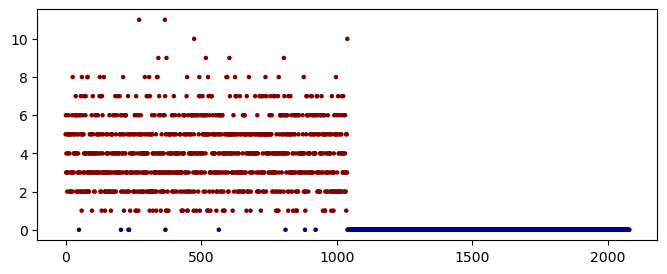

In [485]:
in_adj, in_weight = hhtools.load_network("./data_single/id000000_syn_3.txt")

num_indeg = [len(x) for x in in_adj]
num = np.arange(len(in_adj))

_mean = lambda x: 0 if len(x) == 0 else np.average(x)
avg_weight = np.array([_mean(w) for w in in_weight]) * 1e2

plt.figure(figsize=(8, 3))
plt.scatter(num, num_indeg, s=5, c=avg_weight, cmap="jet")
plt.show()

In [219]:
summary_obj0.summary["chi"].shape

(8, 300, 3)

In [237]:
reload(hhtools)

<module 'hhtools' from '/home/jungyoung/Project/hh_neuralnet/transmission_line/../include/hhtools.py'>

In [255]:
cid = 8

summary_obj0 = hhtools.SummaryLoader("../gen_three_pop_samples_repr/data/")
detail = summary_obj0.load_detail(cid-1, 0)
# print(summary_obj0.get_id(cid-1, nt))

pprint(summary_obj0.summary["chi"][cid-1,2,:])
pprint(summary_obj0.summary["frs_m"][cid-1,2,:])
pprint(summary_obj0.summary["frs_s"][cid-1,2,:])

nt = summary_obj0.get_id(cid-1, 2)
print(nt)

array([0.306094, 0.361432, 0.413361])
array([8.310386, 8.306595, 8.314197])
array([6.074018, 5.622673, 6.494063])
5602


In [542]:
summary_new = hhtools.SummaryLoader("./data/")
print(summary_new.control_names)
summary_new.controls["ratio_set"]

['cluster_id', 'ratio_set']


[0.0, 0.25, 0.5, 0.75, 1.0]

In [543]:
detail = summary_new.load_detail(0, 0, 0)

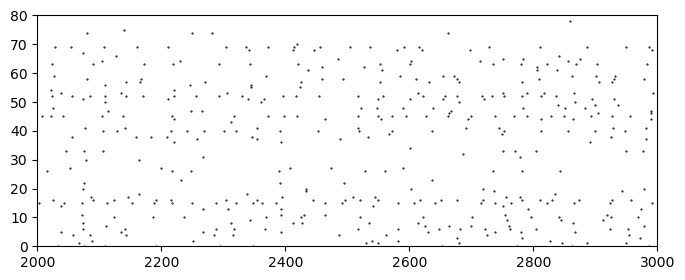

In [544]:
plt.figure(figsize=(8, 3))
hhtools.draw_spk(detail["step_spk"], xl=(2e3, 3e3),
                 sequence=np.concatenate((np.arange(1000, 1040), np.arange(2040, 2080))))
plt.show()

## Firing rate of Receiver population

In [545]:
def get_firing_rate(step_spk_set, tmax, dt=0.01, teq=500): # ms
    fr = np.zeros(len(step_spk_set))
    for n, step_spk in enumerate(step_spk_set):
        x = np.array(step_spk) * dt
        fr[n] = np.sum(x >= teq) / (tmax*1e3-teq) * 1e3
    return fr


tmax = detail["ts"][-1]
# tr = ((1000, 1020), (2040, 2060))
# rr = ((1020, 1040), (2060, 2080))

keys = ("pop", "trans", "recv")
crange = dict(
    pop=((0, 1000), (1040, 2040)),
    trans=((1000, 1020), (2040, 2060)),
    recv=((1020, 1040), (2060, 2080))
)
key_labels = ("population", "transmitter", "receiver")

In [577]:
d1 = summary_new.load_detail(1, 0, 0)
d2 = summary_new.load_detail(1, 3, 0)

pprint(d1["info"][30:39], width=100)
pprint(d2["info"][30:39], width=100)

['connection prob (out):\n',
 '0.223000, 0.223000, 0.223000, 0.223000, 0.334286, 0.334286, 0.334286, 0.000000, \n',
 '0.702000, 0.702000, 0.702000, 0.702000, 0.451286, 0.451286, 0.451286, 0.451286, \n',
 '0.217000, 0.217000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, -2.000000, \n',
 '0.217000, 0.217000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, \n',
 '0.285000, 0.285000, 0.285000, 0.000000, 0.100000, 0.100000, 0.100000, 0.100000, \n',
 '0.320625, 0.320625, 0.320625, 0.320625, 0.262500, 0.262500, 0.262500, 0.262500, \n',
 '0.000000, 0.000000, 0.000000, -2.000000, 0.100000, 0.100000, 0.000000, 0.000000, \n',
 '0.000000, 0.000000, 0.000000, 0.000000, 0.100000, 0.100000, 0.000000, 0.000000, \n']
['connection prob (out):\n',
 '0.223000, 0.223000, 0.223000, 0.223000, 0.334286, 0.334286, 0.334286, 0.000000, \n',
 '0.702000, 0.702000, 0.702000, 0.702000, 0.451286, 0.451286, 0.451286, 0.451286, \n',
 '0.217000, 0.217000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000

In [549]:
nc = 2

print("Cluster ID:", summary_new.controls["cluster_id"][nc])
ratio_set = summary_new.controls["ratio_set"]
nitr_max = summary_new.num_controls[-1]

N = len(ratio_set)

fr_set = dict()
for k in keys:
    fr_set[k] = np.zeros((nitr_max, N, 2))

for nr in range(N):
    for n in range(nitr_max):
        detail = summary_new.load_detail(nc, nr, n)
        
        for k in keys:
            for i in range(2):
                r = crange[k][i]
                fr_set[k][n,nr,i] = get_firing_rate(detail["step_spk"][r[0]:r[1]], tmax).mean()
    

Cluster ID: 8.0


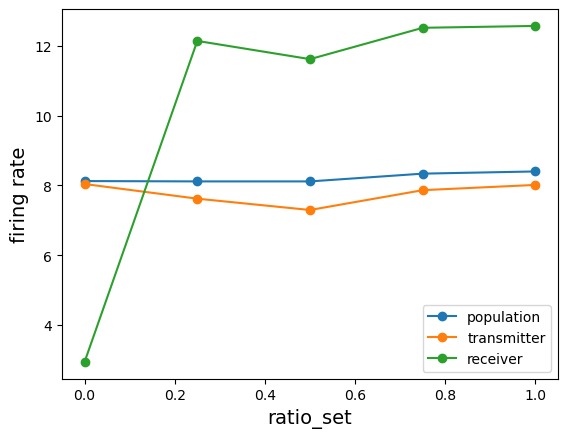

In [550]:
plt.figure()
for k, lb in zip(keys, key_labels):
    plt.plot(ratio_set, fr_set[k].mean(axis=2).mean(axis=0), 'o-', label=lb)
    
plt.xlabel("ratio_set", fontsize=14)
plt.ylabel("firing rate", fontsize=14)
plt.legend()
plt.show()

In [551]:
from numba import njit

def get_spkvec(detail, dt=0.01, srate=2000, cell_range=None):
    tmax = detail["ts"][-1]
    
    if cell_range is None:
        N = len(detail["step_spk"])
        cset = range(N)
    else:
        N = cell_range[1] - cell_range[0]
        cset = range(cell_range[0], cell_range[1])
        
    Nt = int(tmax*srate) + 1
    
    spk_vec_tot = np.zeros((N, Nt))
    for i, n in enumerate(cset):
        spk_vec_tot[i] = convert_spk2vec(detail["step_spk"][n], tmax, dt=dt, srate=srate)
    return spk_vec_tot

@njit
def convert_spk2vec(step_spks, tmax, dt=0.01, srate=2000):
    """
    tmax (s), srate (s), dt (ms)
    """
    spk_vec = np.zeros(int(tmax*srate) + 1)
    for n in step_spks:
        nt = int(n * dt * 1e-3 * srate)
        spk_vec[nt] = 1
    
    return spk_vec

In [553]:
nc = 2

corr_set = []
for nr in range(len(ratio_set)):

    # corr_set = []
    corr_set.append([])
    for nitr in range(10):
        detail = summary_new.load_detail(nc, nr, nitr)
        idt_eq = detail["ts"] >= 0.5

        spk_vec_tr = [[], []]
        for ntr, k in enumerate(("trans", "recv")):
            for i in range(2):
                sv = get_spkvec(detail, cell_range=crange[k][i])
                spk_vec_tr[ntr].append(sv)
            spk_vec_tr[ntr] = np.vstack(spk_vec_tr[ntr])

        N = spk_vec_tr[0].shape[0]
        for n in range(N):
            x, y = spk_vec_tr[0][n][idt_eq], spk_vec_tr[1][n][idt_eq]
            c, tlag = hhsignal.get_correlation(x, y, 2000, max_lag=0.5, norm=False)
            cn = c * len(y) / max(min(x.sum(), y.sum()), 1)

            corr_set[-1].append(cn)

corr_set = np.array(corr_set)
print(corr_set.shape)

(5, 400, 2001)


(5, 400, 2001)


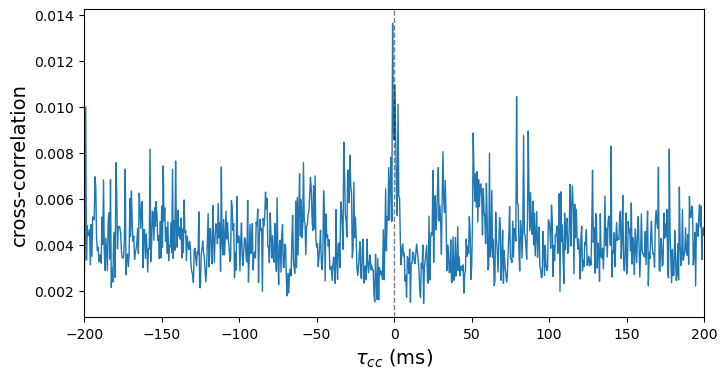

In [564]:
corr_set = np.array(corr_set)
print(corr_set.shape)

plt.figure(figsize=(8, 4), dpi=100)
for nr in range(1):
    y = corr_set[nr].mean(axis=0)
    plt.plot(tlag*1e3, y, lw=1)
    
# plt.xlim([-0.1, 0.1])
plt.xlim([-200, 200])
# plt.xlim([-0.02, 0.02])
plt.xlabel(r"$\tau_{cc}$ (ms)", fontsize=14)
plt.ylabel("cross-correlation", fontsize=14)
visu.draw_indicator(0, color='k')

plt.show()

# positive: RECV -> TRANS
# negative: TRANS -> RECV

In [616]:
spk_vec_tr[0].shape

(40, 21000)

In [676]:
nc = 0

srate = 2000
tw = [-0.05, 5]


num_ratio = len(ratio_set)
num_itr = 10
num_tr = 20

nw = [int(t*srate) for t in tw]
len_w = nw[1] - nw[0]

fr_resp = np.zeros((num_ratio, num_itr*num_tr, len_w))

for nr in range(num_ratio):
    for nitr in range(num_itr):
        detail = summary_new.load_detail(nc, nr, nitr)
        idt_eq = detail["ts"] >= 0.5

        spk_vec_tr = [[], []]
        for ntr, k in enumerate(("trans", "recv")):
            for i in range(2):
                sv = get_spkvec(detail, cell_range=crange[k][i])
                spk_vec_tr[ntr].append(sv)
            spk_vec_tr[ntr] = np.vstack(spk_vec_tr[ntr])
        
        l = spk_vec_tr[0].shape[1]
        for n in range(num_tr):
            nid_set = np.where(spk_vec_tr[0][n] == 1)[0]
            if len(nid_set) == 0:
                continue
                
            for nid in nid_set:
                n0 = max(nid+nw[0], 0)
                n1 = min(nid+nw[1], l)
                
                id0 = n0-(nid+nw[0])
                id1 = len_w - max(nid+nw[1]-l, 0)
                # id1 = min(l-nid-nw[1], len_w)
                
                fr_resp[nr, nitr*num_tr+n, id0:id1] += spk_vec_tr[1][n][n0:n1]

            fr_resp[nr, nitr*num_tr+n, id0:id1] /= len(nid_set)

# fr_response = np.array(fr_response)
print(fr_resp.shape)
x_resp = np.arange(len_w)/srate + tw[0]

(5, 200, 10100)


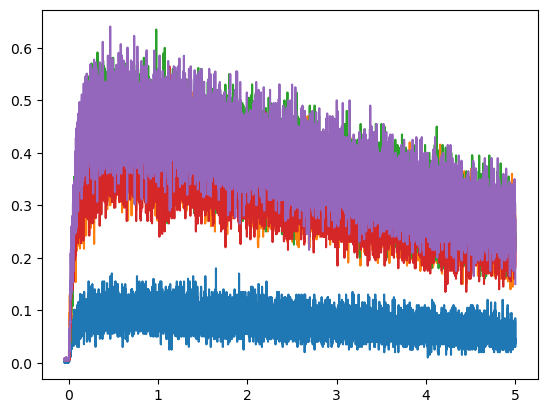

In [677]:
plt.figure()
for i in range(5):
    plt.plot(x_resp, fr_resp[i].mean(axis=0))
plt.show()